# About the dataset

This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake. The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each. 
Business Objective:
**Need to classify the fake and real news accurately**

To accurately classify fake and real news, you can employ a machine learning model using natural language processing (NLP) techniques. 
1. Data Preprocessing
2. Text Representation
    TF-IDF
3. Feature Engineering
    N-grams
    Sentiment Analysis: Analyze the sentiment of the text (positive,negative, neutral) and use it as a feature.
4. Model Selection and training
5. Model evaluation
6. Model deployment

**Columns:**

**Title:** The title or headline of the news article.

**Text:** The main text or content of the news article.

**Subject:** The subject or category of the news article.

**Date:** The date when the news article was published.

# Loading libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
from wordcloud import WordCloud
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from collections import Counter
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

In [18]:
fake_data=pd.read_csv('Fake.csv', encoding='latin-1',error_bad_lines=False)

In [4]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
true_data=pd.read_csv('True.csv',encoding='latin-1',error_bad_lines=False,engine='python')

Skipping line 11067: ',' expected after '"'


In [6]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


**fake dataset details**

In [8]:
fake_data.shape

(23481, 4)

In [9]:
fake_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [65]:
# number of articles in the dataset
num_articles1= len(fake_data)
num_articles2= len(true_data)
print("Number of articles:", num_articles1+num_articles2)

Number of articles: 44897


In [66]:
fake_data['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [67]:
article_counts1 = fake_data['subject'].value_counts()

In [12]:
# Get the earliest and latest dates in the dataset
earliest_date = fake_data['date'].min()
latest_date = fake_data['date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: 14-Feb-18
Latest date: https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg


**True dataset details**

In [13]:
true_data.shape

(21416, 4)

In [14]:
true_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [15]:
true_data['subject'].value_counts()

politicsNews    11271
worldnews       10145
Name: subject, dtype: int64

In [16]:
article_counts2 = true_data['subject'].value_counts()

In [17]:
# Get the earliest and latest dates in the dataset
earliest_date = true_data['date'].min()
latest_date = true_data['date'].max()
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

Earliest date: April 1, 2016 
Latest date: September 9, 2017 


# EDA

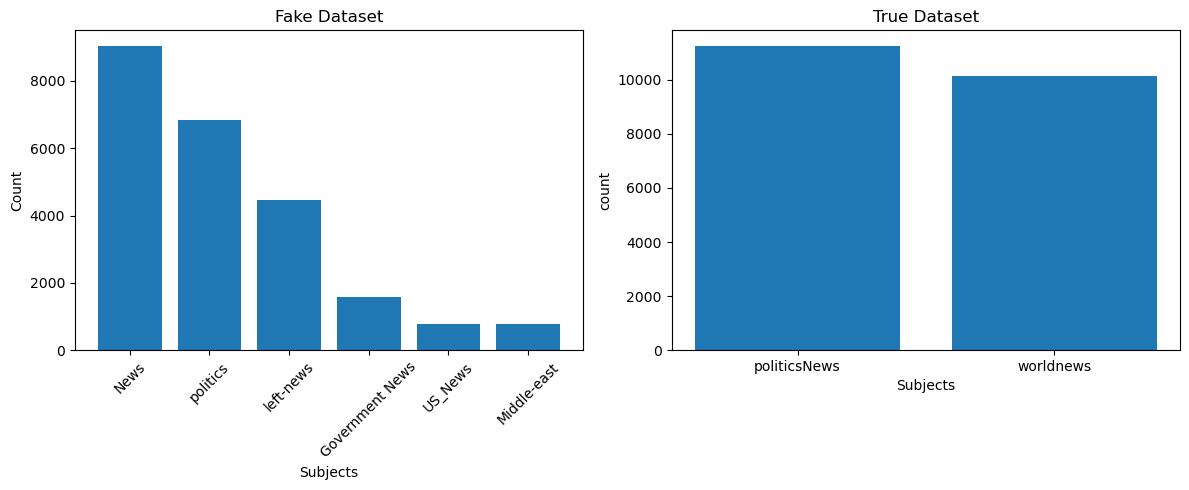

In [96]:
# Plot the number of articles by category

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.title('Number of Articles by Category')
# Bar graph for fake dataset subject distribution with percentages
axes[0].bar(article_counts1.index, article_counts1.values)
axes[0].set_title("Fake Dataset")
axes[0].set_xticklabels(['News',"politics","left-news","Government News","US_News","Middle-east"], rotation=45)
axes[0].set_xlabel("Subjects")
axes[0].set_ylabel("Count")

# Bar graph for real dataset subject distribution with percentages
axes[1].bar(article_counts2.index, article_counts2.values)
axes[1].set_title("True Dataset")
axes[1].set_xlabel("Subjects")
axes[1].set_ylabel("count")

plt.tight_layout()
plt.show()

Here we have plotted the **number of articles by category comparing the Fake dataset with true dataset**

We have noticed that the number of sources from which we recieved fake news is more than the number of sources we recieved for true dataset.

The politics news for fake dataset is around 6000 and for true dataset is 11000 which is almost double.

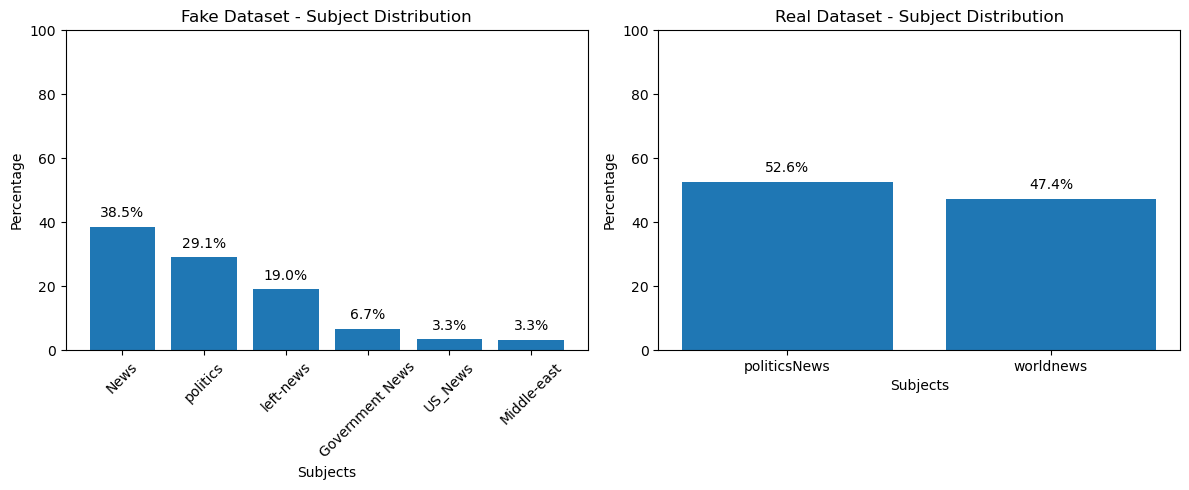

In [41]:
# Calculate the percentages for subject counts
fake_subject_counts = fake_data["subject"].value_counts(normalize=True) * 100
real_subject_counts = true_data["subject"].value_counts(normalize=True) * 100

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar graph for fake dataset subject distribution with percentages
axes[0].bar(fake_subject_counts.index, fake_subject_counts.values)
axes[0].set_title("Fake Dataset - Subject Distribution")
axes[0].set_xticklabels(['News',"politics","left-news","Government News","US_News","Middle-east"], rotation=45)
axes[0].set_xlabel("Subjects")
axes[0].set_ylabel("Percentage")
axes[0].set_ylim([0, 100])  # Set y-axis limit to percentages

# Add percentages on the bars
for i, v in enumerate(fake_subject_counts.values):
    axes[0].text(i, v + 2, f"{v:.1f}%", ha="center", va="bottom")

# Bar graph for real dataset subject distribution with percentages
axes[1].bar(real_subject_counts.index, real_subject_counts.values)
axes[1].set_title("Real Dataset - Subject Distribution")
axes[1].set_xlabel("Subjects")
axes[1].set_ylabel("Percentage")
axes[1].set_ylim([0, 100])  # Set y-axis limit to percentages

# Add percentages on the bars
for i, v in enumerate(real_subject_counts.values):
    axes[1].text(i, v + 2, f"{v:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

The politics news for true dataset is nearly 50% the total data.

The politics news for fake dataset is nearly 30% the total data.

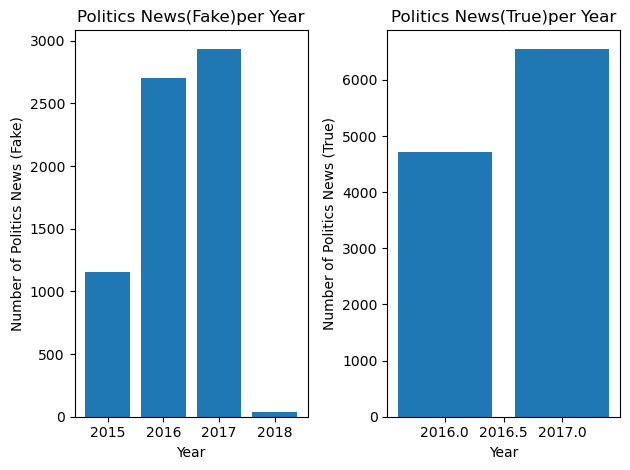

In [102]:
# Extract the year information
true_data['year'] = pd.to_datetime(true_data['date']).dt.year
fake_data['year'] = pd.to_datetime(fake_data['date']).dt.year

# Filter the politics articles
true_politics_df = true_data[true_data['subject'] == 'politicsNews']
fake_politics_df = fake_data[fake_data['subject'] == 'politics']

# Count the number of politics articles per year
true_politics_count = true_politics_df['year'].value_counts().sort_index()
fake_politics_count = fake_politics_df['year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
plt.bar(fake_politics_count.index, fake_politics_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Politics News (Fake)')
plt.title('Politics News(Fake)per Year')

plt.subplot(1, 2, 2)
plt.bar(true_politics_count.index, true_politics_count.values)
plt.xlabel('Year')
plt.ylabel('Number of Politics News (True)')
plt.title('Politics News(True)per Year')

plt.tight_layout()
plt.show()

**The Fake politics news has suddenly dropped in the year 2018**

The fake politics news is very high in the years 2016 and 2017 may be due to the 2016 campaign and elections

The true politic news is increased gradually as it has to be

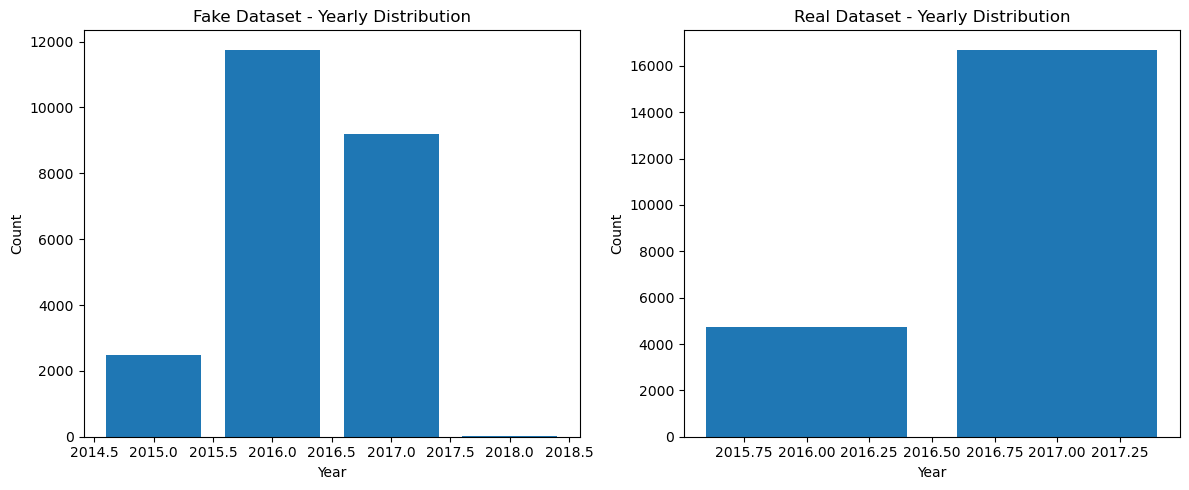

In [45]:
# Convert the date column to datetime format
fake_data["date"] = pd.to_datetime(fake_data["date"])
true_data["date"] = pd.to_datetime(true_data["date"])

# Extract the year from the date column
fake_data["year"] = fake_data["date"].dt.year
true_data["year"] = true_data["date"].dt.year

# Calculate the yearly counts
fake_yearly_counts = fake_data["year"].value_counts().sort_index()
real_yearly_counts = true_data["year"].value_counts().sort_index()

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar graph for fake dataset yearly distribution
axes[0].bar(fake_yearly_counts.index, fake_yearly_counts.values)
axes[0].set_title("Fake Dataset - Yearly Distribution")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Count")
# Bar graph for real dataset yearly distribution
axes[1].bar(real_yearly_counts.index, real_yearly_counts.values)
axes[1].set_title("Real Dataset - Yearly Distribution")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


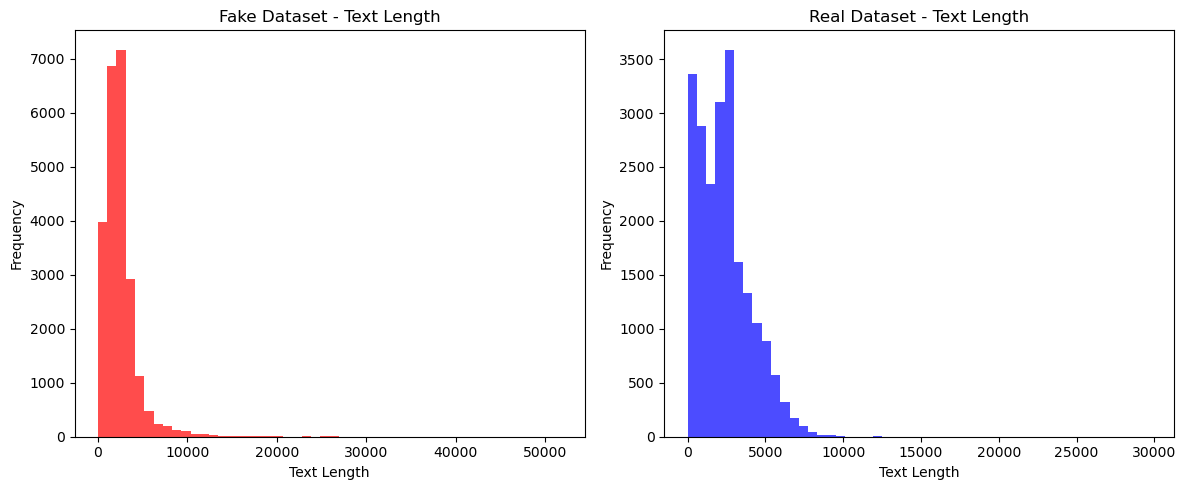

In [47]:
# Calculate the length of the text in each dataset
fake_data['text_length'] = fake_data['text'].apply(lambda x: len(str(x)))
true_data['text_length'] = true_data['text'].apply(lambda x: len(str(x)))

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for fake dataset text length
axes[0].hist(fake_data['text_length'], bins=50, color='red', alpha=0.7)
axes[0].set_title("Fake Dataset - Text Length")
axes[0].set_xlabel("Text Length")
axes[0].set_ylabel("Frequency")

# Histogram for real dataset text length
axes[1].hist(true_data['text_length'], bins=50, color='blue', alpha=0.7)
axes[1].set_title("Real Dataset - Text Length")
axes[1].set_xlabel("Text Length")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [18]:
#wordcloud
text=' '.join(fake_data['text'].tolist())

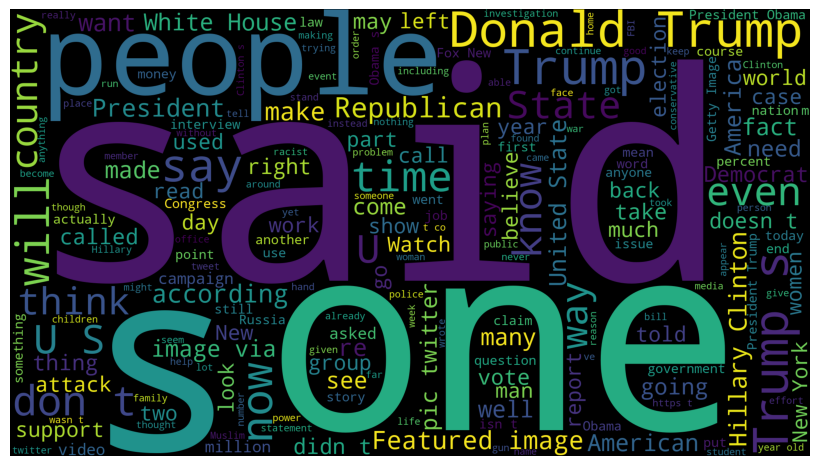

In [19]:
plt.figure(figsize=(8,8))
wordcloud=WordCloud(width=1950,height=1089).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [22]:
#wordcloud
text=' '.join(true_data['text'].tolist())

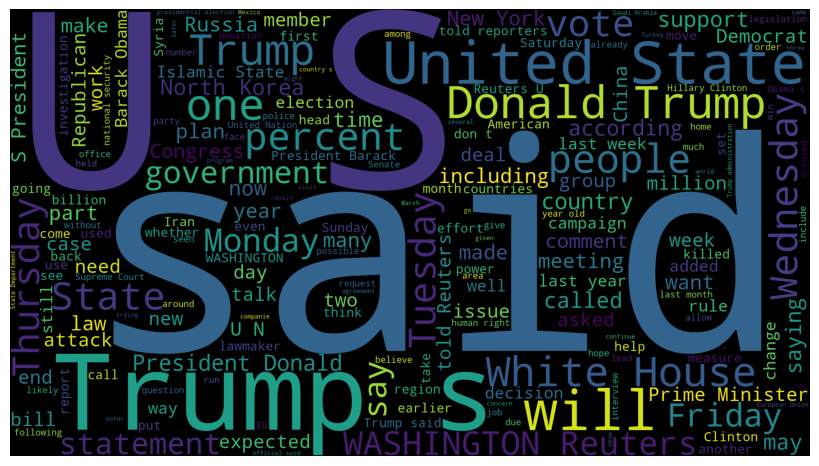

In [23]:
plt.figure(figsize=(8,8))
wordcloud=WordCloud(width=1950,height=1089).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Combining both the datasets

In [20]:
# Concatenate the datasets and create a new column for the label
fake_data['label'] = 'fake'
true_data['label'] = 'true'
combined_data = pd.concat([fake_data, true_data], ignore_index=True)

In [21]:
combined_data.drop(['subject', 'date'], axis=1, inplace=True)

In [9]:
combined_data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",fake
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,fake


In [7]:
combined_data.duplicated().sum()

5793

In [22]:
combined_data.drop_duplicates(inplace=True)

In [7]:
combined_data.duplicated().sum()

0

In [10]:
combined_data['label'].value_counts()

true    21196
fake    17908
Name: label, dtype: int64

In [11]:
combined_data['text']

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44892    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44893    LONDON (Reuters) - LexisNexis, a provider of l...
44894    MINSK (Reuters) - In the shadow of disused Sov...
44895    MOSCOW (Reuters) - Vatican Secretary of State ...
44896    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 39104, dtype: object

# text preprocessing

In [26]:
combined_data['text'] = combined_data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
combined_data['text'].head()

0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday, it was revealed that former milwauk...
3    on christmas day, donald trump announced that ...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stop = stopwords.words('english')

In [29]:
combined_data['text'] = combined_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
combined_data['text'].head()

0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday, revealed former milwaukee sheriff davi...
3    christmas day, donald trump announced would ba...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [30]:
combined_data['text'] = combined_data['text'].str.replace('[^\w\s]','')
combined_data['text'].head()

0    donald trump wish americans happy new year lea...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [31]:
from textblob import TextBlob
combined_data['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    donald tramp wish americans happy new year lea...
1    house intelligence committee chairman devil nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald tramp announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srima\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
combined_data['text'].apply(lambda x: " ".join([ps.stem(word) for word in x.split()]))

0        donald trump wish american happi new year leav...
1        hous intellig committe chairman devin nune go ...
2        friday reveal former milwauke sheriff david cl...
3        christma day donald trump announc would back w...
4        pope franci use annual christma day messag reb...
                               ...                        
44892    brussel reuter nato alli tuesday welcom presid...
44893    london reuter lexisnexi provid legal regulator...
44894    minsk reuter shadow disus sovietera factori mi...
44895    moscow reuter vatican secretari state cardin p...
44896    jakarta reuter indonesia buy 11 sukhoi fighter...
Name: text, Length: 39104, dtype: object

In [34]:
from textblob import Word
combined_data['text'] = combined_data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
combined_data['text'].head()

0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [35]:
combined_data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year...,donald trump wish american happy new year leav...,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,0
3,Trump Is So Obsessed He Even Has Obamas Name...,christmas day donald trump announced would bac...,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,0


In [16]:
len(pd.Series(' '.join(combined_data['text']).split()).value_counts())

218814

In [64]:
#most frequent words

In [22]:
freq1 = pd.Series(' '.join(combined_data[combined_data['label']=='true']['text']).split()).value_counts()[:10]
print(freq1)

said          97810
trump         53727
u             40656
state         35942
would         31146
reuters       28089
president     26689
republican    21961
government    19169
year          18539
dtype: int64


In [23]:
freq2 = pd.Series(' '.join(combined_data[combined_data['label']=='fake']['text']).split()).value_counts()[:10]
freq2

trump        63609
said         22914
people       20742
president    19574
one          18216
would        18157
state        15895
u            14809
donald       14783
like         14451
dtype: int64

In [24]:
true_freq=pd.Series(freq1)
fake_freq=pd.Series(freq2)


unique1=(freq1.index) & (freq2.index)
unique2=(freq2.index)& (freq1.index)
print(unique1)
print('\n')
print(unique2)

Index(['said', 'trump', 'u', 'state', 'would', 'president'], dtype='object')


Index(['trump', 'said', 'president', 'would', 'state', 'u'], dtype='object')


In [25]:
freq = pd.Series(' '.join(combined_data['text']).split()).value_counts()[:10]
freq

said          120724
trump         117336
u              55465
state          51837
would          49303
president      46263
republican     35997
people         35862
one            31121
year           29362
dtype: int64

In [26]:
freq = list(freq.index)
combined_data['text'] = combined_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
combined_data['text'].head()

0    donald wish american happy new leave that inst...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald announced back work follo...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [ ]:
#least frequent words

In [16]:
freq = pd.Series(' '.join(combined_data['text']).split()).value_counts()[-200:]
freq

postsurverymonkey    1
readersafter         1
itrich               1
14so                 1
totalso              1
                    ..
facebravo            1
homersexual          1
wingthe              1
concernednoting      1
perdangangan         1
Length: 200, dtype: int64

In [17]:
freq = list(freq.index)
combined_data['text'] = combined_data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
combined_data['text'].head()

0    donald trump wish american happy new year leav...
1    house intelligence committee chairman devin nu...
2    friday revealed former milwaukee sheriff david...
3    christmas day donald trump announced would bac...
4    pope francis used annual christmas day message...
Name: text, dtype: object

In [39]:
len(pd.Series(' '.join(combined_data['text']).split()).value_counts())

218604

In [24]:
TextBlob(combined_data['text'][1]).words

WordList(['house', 'intelligence', 'committee', 'chairman', 'devin', 'nunes', 'going', 'bad', 'day', 'assumption', 'like', 'many', 'christopher', 'steeledossier', 'prompted', 'russia', 'investigation', 'lashing', 'department', 'justice', 'fbi', 'order', 'protect', 'happens', 'dossier', 'started', 'investigation', 'according', 'document', 'obtained', 'new', 'york', 'timesformer', 'campaign', 'adviser', 'george', 'papadopoulos', 'drunk', 'wine', 'bar', 'revealed', 'knowledge', 'russian', 'opposition', 'research', 'hillary', 'clintonon', 'top', 'that', 'papadopoulos', 'covfefe', 'boy', 'administration', 'alleged', 'much', 'larger', 'role', 'none', 'damning', 'drunken', 'fool', 'wine', 'bar', 'coffee', 'boy', 'help', 'arrange', 'new', 'york', 'meeting', 'abdel', 'fattah', 'elsisi', 'egypt', 'two', 'month', 'election', 'known', 'former', 'aide', 'set', 'meeting', 'world', 'leader', 'team', 'ran', 'merely', 'coffee', 'boyin', 'may', '2016', 'papadopoulos', 'revealed', 'australian', 'diplomat

# label_encoder

**Changing fake as 0 and true as 1 values since the label column is the target variable**

In [36]:
 #Encode the label column
label_encoder = LabelEncoder()
combined_data['label'] = label_encoder.fit_transform(combined_data['label'])

In [24]:
combined_data.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [40]:
# Split the dataset into training and testing sets
x = combined_data['text']
y = combined_data['label']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
ngram_range = (1, 3) 
count_vectorizer = CountVectorizer(ngram_range=ngram_range,max_features=3000)

In [25]:
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)

In [26]:
feature_names = count_vectorizer.get_feature_names_out()

In [50]:
lr1 = LogisticRegression()
rf1 = RandomForestClassifier()
knn1 = KNeighborsClassifier()
xgboost1 = XGBClassifier()
dt1 = DecisionTreeClassifier()

In [29]:
models = [lr1, rf1, knn1, xgboost1, dt1]
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Decision Tree']

In [30]:
print("no. of unigrams: ", len([a for a in feature_names if len(a.split())==1]))
print("No. of bigrams: ", len([a for a in feature_names if len(a.split())==2]))
print("No. of trigrams: ", len([a for a in feature_names if len(a.split())==3]))

no. of unigrams:  2748
No. of bigrams:  224
No. of trigrams:  28


In [31]:
cross_validation=True
cv_folds=5

In [32]:
for model, model_name in zip(models, model_names):
    model.fit(X_train_cv, y_train) #Training our model
    y_pred = model.predict(X_test_cv)  # Making the predictions on test data
    accuracy = accuracy_score(y_test, y_pred)
    precision= precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    print(f"{model_name}\n   Accuracy: {accuracy:.5f}")
    if cross_validation:
        cv_scores= cross_val_score(model,X_train_cv,y_train,cv=cv_folds,scoring='accuracy')
        print(f"   Cross-Validation Accuracy: {cv_scores.mean():.5f}\n   precision: {precision:.5f}\n   recall: {recall:.5f}")

Logistic Regression
   Accuracy: 0.99478
   Cross-Validation Accuracy: 0.99448
   precision: 0.99435
   recall: 0.99604
Random Forest
   Accuracy: 0.99611
   Cross-Validation Accuracy: 0.99639
   precision: 0.99474
   recall: 0.99811
KNN
   Accuracy: 0.79532
   Cross-Validation Accuracy: 0.78209
   precision: 0.83384
   recall: 0.77771
XGBoost
   Accuracy: 0.99611
   Cross-Validation Accuracy: 0.99642
   precision: 0.99530
   recall: 0.99755
Decision Tree
   Accuracy: 0.99315
   Cross-Validation Accuracy: 0.99356
   precision: 0.99266
   recall: 0.99472


In [32]:
model ={
    'LR':'lr1',
    'RF':'rf1',
    'KNN':'knn1',
    'XGboost':'xgboost1',
    'DT':'dt1'}

In [33]:
accuracy_scores=[0.99478,0.99652,0.79532,0.99642,0.99356]
precision_scores=[0.99435,0.99418,0.83384,0.99530,0.99304]
recall_scores=[0.99304,0.99304,0.77771,0.99755,0.99510]
df1=pd.DataFrame({'model':model.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores}).sort_values('Precision',ascending=False)    

In [37]:
df1

,model,Accuracy,Precision,Recall
3,XGboost,0.99642,0.99530,0.99755
0,LR,0.99478,0.99435,0.99304
1,RF,0.99652,0.99418,0.99304
4,DT,0.99356,0.99304,0.99510
2,KNN,0.79532,0.83384,0.77771


# tfidf

In [42]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidfvec = TfidfVectorizer(stop_words='english',max_features=3000, max_df =1.0, smooth_idf=True)
x= tfidfvec.fit_transform(combined_data["text"]).toarray()

In [59]:
y=combined_data['label']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [51]:
lr2 = LogisticRegression()
rf2 = RandomForestClassifier(n_estimators=50)
knn2 = KNeighborsClassifier()
xgboost2 = XGBClassifier()
dt2 = DecisionTreeClassifier(max_depth=5)

In [52]:
models = [lr2, rf2, knn2, xgboost2, dt2]

In [53]:
model_names = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Decision Tree']
model_names

['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Decision Tree']

In [35]:
for model, model_name in zip(models, model_names):
    model.fit(X_train_tfidf, y_train)
    # cross-validation
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
    avg_accuracy = scores.mean()
    print(f"{model_name}:\n   Accuracy = {avg_accuracy:.5f}")

    # Make predictions on the test set
    y_pred = model.predict(X_test_tfidf)
    precision= precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    # Evaluate the model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"   Accuracy on Test Set: {accuracy:.5f}\n   precision: {precision:.5f}\n   recall: {recall:.5f}")

Logistic Regression:
   Accuracy = 0.98510
   Accuracy on Test Set: 0.98711
   precision: 0.98538
   recall: 0.99095
Random Forest:
   Accuracy = 0.99618
   Accuracy on Test Set: 0.99560
   precision: 0.99473
   recall: 0.99717
KNN:
   Accuracy = 0.65947
   Accuracy on Test Set: 0.68566
   precision: 0.93020
   recall: 0.45475
XGBoost:
   Accuracy = 0.99635
   Accuracy on Test Set: 0.99611
   precision: 0.99548
   recall: 0.99736
Decision Tree:
   Accuracy = 0.99618
   Accuracy on Test Set: 0.99529
   precision: 0.99399
   recall: 0.99736


In [52]:
model ={
    'LR':'lr2',
    'RF':'rf2',
    'KNN':'knn2',
    'XGboost':'xgboost2',
    'DT':'dt2'}

In [ ]:
accuracy_scores=[0.98510,0.99611,0.68566,0.99635,0.99622]
precision_scores=[0.98538,0.99530,0.93020,0.99548, 0.99417]
recall_scores=[0.99095,0.99755,0.45475,0.99736,0.99736]
df2=pd.DataFrame({'model':model.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores}).sort_values('Precision',ascending=False)    

In [77]:
df2

,model,Accuracy,Precision,Recall
3,XGboost,0.99635,0.99548,0.99736
1,RF,0.99642,0.99511,0.99830
4,DT,0.99622,0.99417,0.99736
0,LR,0.98510,0.98538,0.99095
2,KNN,0.68566,0.93020,0.45475


# word2vec

In [22]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from gensim.models import Word2Vec

In [69]:
gensim.__version__

'4.3.1'

In [23]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [24]:
wv=api.load('word2vec-google-news-300') #pre-trained Word2Vec model from Google News dataset

In [25]:
def spacy_tokenizer(sentence):
    doc=nlp(sentence)
    tokens=[word.lemma_.lower().strip() for word in doc]
    tokens=[word for word in tokens if word not in stop_words and word not in punctuations]
    return tokens

In [26]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [27]:
stop_words=nlp.Defaults.stop_words

In [28]:
punctuations=string.punctuation

In [29]:
combined_data['tokens']=combined_data['text'].apply(spacy_tokenizer)

In [30]:
w2v_model = Word2Vec(combined_data['tokens'], vector_size=300, window=5, min_count=1, workers=4)  #for training the model

In [31]:
def wordvec(sentence):
    vector_size=w2v_model.vector_size
    wv_res=np.zeros(vector_size)
    ctr=1
    for w in sentence:
        if w in w2v_model.wv:
            ctr += 1
            wv_res += w2v_model.wv[w]
            wv_res=wv_res/ctr
    return wv_res

In [32]:
combined_data['vec']=combined_data['text'].apply(wordvec)

In [33]:
X_vec = combined_data['vec'].to_list()
y = combined_data['label']

In [34]:
combined_data.head()

,title,text,label,tokens,vec
0,Donald Trump Sends Out Embarrassing New Year...,donald wish american happy new leave that inst...,0,"[donald, wish, american, happy, new, leave, in...","[0.0003116459605796987, 4.9726011347847424e-05..."
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,0,"[house, intelligence, committee, chairman, dev...","[0.00044637193303667617, 7.114023024187282e-05..."
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,0,"[friday, reveal, milwaukee, sheriff, david, cl...","[0.0002278994088633845, 3.6389680299724696e-05..."
3,Trump Is So Obsessed He Even Has Obamas Name...,christmas day donald announced back work follo...,0,"[christmas, day, donald, announce, work, follo...","[0.0002994446903294507, 4.778420216693128e-05,..."
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,0,"[pope, francis, use, annual, christmas, day, m...","[0.00043055096440920113, 6.862812424533208e-05..."


In [37]:
lr3 = LogisticRegression()
rf3 = RandomForestClassifier()
knn3 = KNeighborsClassifier()
xgboost3 = XGBClassifier()
dt3 = DecisionTreeClassifier()

In [38]:
models = [lr3, rf3, knn3, xgboost3, dt3]

In [39]:
models = {'Logistic Regression': lr3,
    'Random Forest': rf3,
    'KNN': knn3,
    'XGBoost': xgboost3,
    'Decision Tree': dt3}

In [40]:
X_train_wv, X_test_wv,y_train,y_test =train_test_split(X_vec,y,test_size=0.25,stratify=y,random_state=42)

In [41]:
for model_name, model in models.items():
    # Training the model
    model.fit(X_train_wv,y_train)
    # cross-validation
    scores = cross_val_score(model, X_train_wv, y_train, cv=5)
    avg_accuracy = scores.mean()
    print(f"{model_name}:\n   Accuracy = {avg_accuracy:.5f}")
    # Making predictions on test data
    y_pred=model.predict(X_test_wv)

    accuracy = accuracy_score(y_test, y_pred)
    precision= precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    print(f"   Accuracy on Test Set: {accuracy:.5f}\n   precision: {precision:.5f}\n   recall: {recall:.5f}")
    print()

Logistic Regression:
   Accuracy = 0.55401
   Accuracy on Test Set: 0.55217
   precision: 0.54856
   recall: 0.98169

Random Forest:
   Accuracy = 0.71652
   Accuracy on Test Set: 0.72207
   precision: 0.74386
   recall: 0.74316

KNN:
   Accuracy = 0.69326
   Accuracy on Test Set: 0.69834
   precision: 0.71639
   recall: 0.73410

XGBoost:
   Accuracy = 0.77363
   Accuracy on Test Set: 0.77782
   precision: 0.76487
   recall: 0.85205

Decision Tree:
   Accuracy = 0.71041
   Accuracy on Test Set: 0.72054
   precision: 0.75351
   recall: 0.71995



In [4]:
model ={
    'LR':'lr3',
    'RF':'rf3',
    'KNN':'knn3',
    'XGboost':'xgboost3',
    'DT':'dt3'}

In [8]:
accuracy_scores=[0.76630,0.79126,0.74161,0.79208,0.68181]
precision_scores=[0.75161,0.77994,0.73766,0.78828,0.71035]
recall_scores=[0.83544,0.84072,0.82091,0.78828,0.71089]
df3=pd.DataFrame({'model':model.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores}).sort_values('Precision',ascending=False)    

In [6]:
df3

,model,Accuracy,Precision,Recall
3,XGboost,0.79208,0.78828,0.78828
1,RF,0.79126,0.77994,0.84072
0,LR,0.76630,0.75161,0.83544
2,KNN,0.74161,0.73766,0.82091
4,DT,0.68181,0.71035,0.71089


In [56]:
x_train.shape,y_train.shape,x_test.shape,y_test

((31283,), (31283,))

We have got **Random forest classifier** using **TFIDF vectorizer** a better accuracy **99.642%** so we will load the model and use it for the further deployment

In [62]:
rf2 = RandomForestClassifier(n_estimators=50, random_state=2)

In [64]:
from sklearn.metrics import confusion_matrix
rf2.fit(x_train,y_train)
y_pred=rf2.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9966756169287815
[[3543   18]
 [   8 4252]]
0.9957845433255269


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3561
           1       1.00      1.00      1.00      4260

    accuracy                           1.00      7821
   macro avg       1.00      1.00      1.00      7821
weighted avg       1.00      1.00      1.00      7821



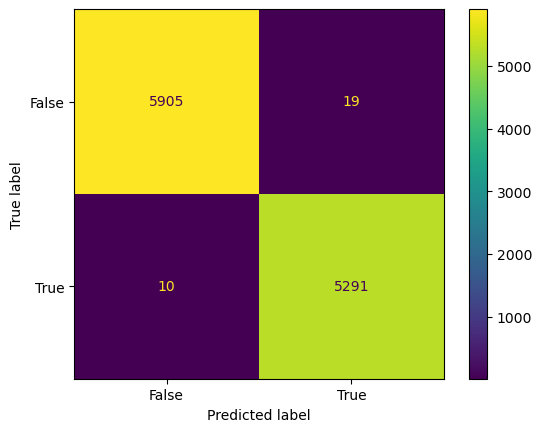

In [38]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_test_pred_rf)
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False, True])
  
cm_display.plot()
plt.show()

In [9]:
#saving model using joblib

In [66]:
import joblib
filename = "model.joblib"
joblib.dump(rf2,filename)

['model.joblib']

In [10]:
#saving the vectorizer

In [67]:
tfidf_obj = tfidfvec.fit(combined_data['text'])
joblib.dump(tfidf_obj, 'tf-idf.joblib')

['tf-idf.joblib']

In [69]:
#Manual testing

In [70]:
#loading both the model and vectorizer
tfidf_loaded = joblib.load("tf-idf.joblib")
model_loaded= joblib.load("model.joblib")

In [71]:
#true
text='WASHINGTON (Reuters) - The story headlined U.S. House tax panel chairman says flexible on mortgage deduction published at 2050 GMT is withdrawn as U.S. House tax panel chairman Kevin Brady mistook the question which referred to property tax reductions in the Republican tax reform plan announced earlier Thursday.   There will be no replacement story. '

In [74]:
from textblob import Word    
ps = PorterStemmer()
def preprocessing(text):
    text = text.lower()
    text = text.replace('[^\w\s]','')
    text = text.split()
    text = [word for word in text if word not in set(stopwords.words('english'))]
    text = [ps.stem(word) for word in text]
    text = [Word(word).lemmatize() for word in text]
    preprocessed_text = ' '.join(text)
    return preprocessed_text

In [75]:
preprocessed_text=preprocessing(text)

In [78]:
prediction=model_loaded.predict(tfidf_loaded.transform([preprocessed_text]))

In [79]:
print(prediction)
if (prediction[0]==0):
    print('The news is FAKE')
else:
    print('The news is True')

[1]
The news is True


In [80]:
text='I ll bet if you go to your kitchen and look at the calendar by your fridge, in tiny letters at the bottom of today s date it says  Patriot Day.  If not, don t worry   the official title for today s remembrance only began in 2002, the year after the terrorist attack that changed almost everything about the way our nation conducts itself. The word  patriot  means different things to different people, and we won t pretend to speak for them all here. But we know it when we see it, and we know the opposite of it, as well.Patriotism is what we see when we watched Americans coming together in grief and solidarity, helping each other in the aftermath of the attack. The opposite of it is what we saw when former New York mayor Rudy Giuliani politically invoked the attacks so much that Vice President Joe Biden once remarked that all Giuliani needed  to make a sentence is a noun, a verb, and 9/11.  Patriotism was on the face of our last President, holding a soup ladle in a national day of service in 2011. The opposite is what you call it when Rush Limbaugh attacked him and said he was  visiting the beneficiaries of his policies. Patriotism, in the words of Clarence Darrow,  hates injustice in its own land more than anywhere else. What it does not do is tout itself as superior. We see nothing but that from Donald Trump. When Trump lied on national television   one of more than a thousand times he s done so since his election   and said that he heard Muslims  cheering  the fall of the towers, perhaps what he was actually doing was projecting a little bit of his own guilt onto adherents of a religion he doesn t and has no desire to understand.Maybe, just maybe, Donald Trump felt a tiny bit bad for saying the worst thing anyone in America said on that fateful day in 2001: 40 Wall Street actually was the second-tallest building in downtown Manhattan, and it was actually, before the World Trade Center, was the tallest-and then, when they built the World Trade Center, it became known as the second-tallest. And now it s the tallest. What s at 40 Wall Street? The 71-story Trump Building.Listen here, if you can.Featured image via John Moore/Getty Images'
preprocessed_text=preprocessing(text)
prediction=model_loaded.predict(tfidf_loaded.transform([preprocessed_text]))
print(prediction)
if (prediction[0]==0):
    print('This is a FAKE news')
else:
    print('This is a True news')

[0]
This is a FAKE news


In [2]:
#Global Deployment
#using github

In [1]:
%%html
<a href="https://true-and-fake-news-detection-cyszy494bf.streamlit.app/">Fake And Real news Detection</a>